In [ ]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
import numpy as np
from pathlib import Path


In [ ]:
train_path = Path('../dataset/train/')

In [84]:
def get_bbox(image_path):
    image_path = Path(image_path)
    bbox_path = image_path.parent / "p_bb_{}.npy".format(image_path.stem.split('_')[-1])
    p_bb = np.load(bbox_path)
    p  = p_bb[:,0]
    bb = p_bb[:,1:5]
    #bb_filtered = bb[(bb != 0).any(axis=1)]
    return tensor(np.flip(bb.reshape(-1, 2), axis=1).copy())

In [140]:
dataset = (PointsItemList.from_folder(train_path, extensions=['.jpg'])
            .split_by_rand_pct(valid_pct=0.2, seed=123)
            .label_from_func(get_bbox))

In [139]:
data = (dataset.databunch(bs=64).normalize(imagenet_stats))

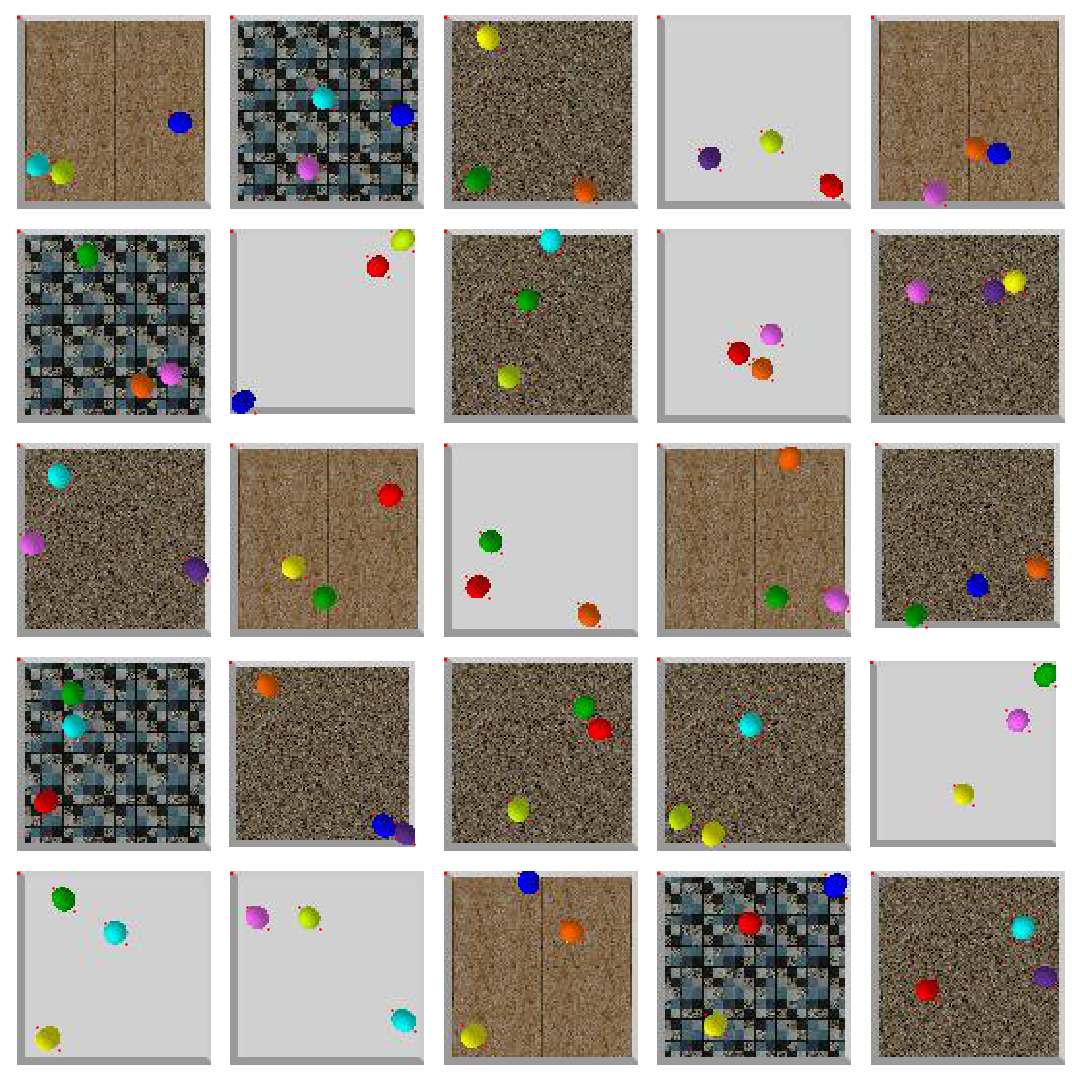

In [86]:
data.show_batch(rows=5, ds_type=DatasetType.Valid, figsize=(15,15))

In [ ]:
Learner()

In [87]:
learn = cnn_learner(data, models.resnet34)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 2.51E-02


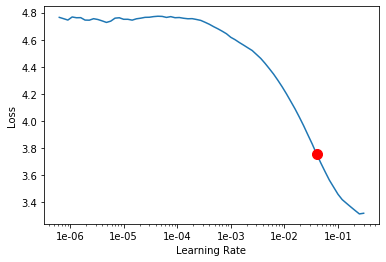

In [89]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [91]:
learn.fit_one_cycle(5, slice(2.51E-02))

epoch,train_loss,valid_loss,time
0,0.346368,0.201439,00:11
1,0.100496,0.059405,00:11
2,0.063849,0.030716,00:11
3,0.046568,0.020095,00:11
4,0.036815,0.015972,00:11


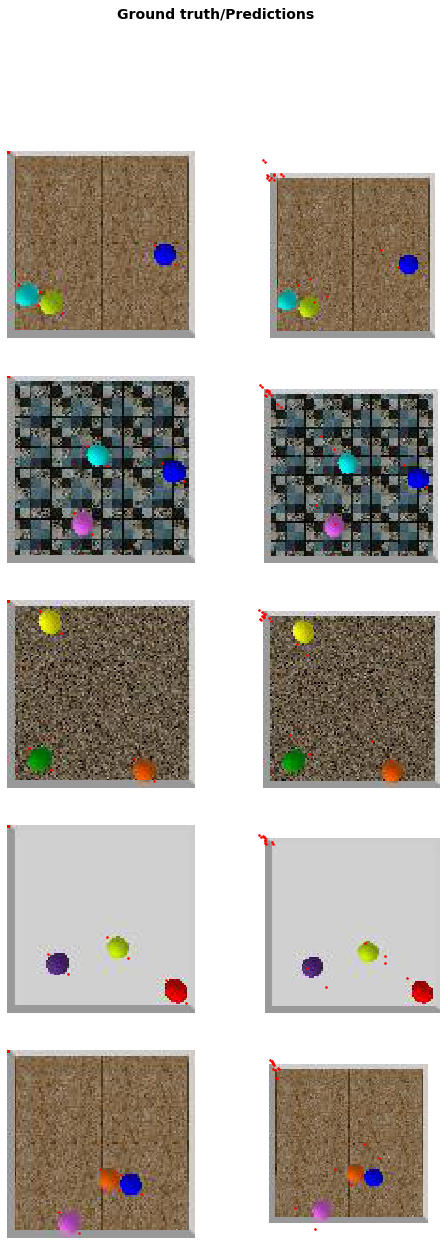

In [92]:
learn.show_results()

In [96]:
snapshot_dir = Path('./snapshots').resolve()
snapshot_dir.mkdir(exist_ok=True)

In [97]:
learn.save(snapshot_dir / 'stage-1')

In [104]:
learn.load(snapshot_dir / 'stage-1');

In [105]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-05
Min loss divided by 10: 7.59E-06


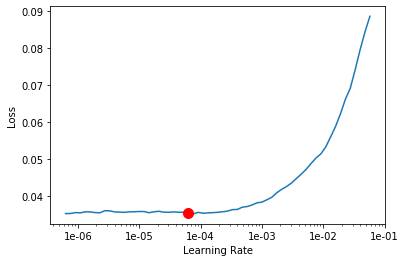

In [106]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [107]:
learn.fit_one_cycle(10, slice(4.79E-06, 2.51E-03))

epoch,train_loss,valid_loss,time
0,0.032538,0.012102,00:15
1,0.029212,0.009735,00:15
2,0.027592,0.009347,00:15
3,0.026063,0.006394,00:15
4,0.023463,0.004935,00:15
5,0.022411,0.003911,00:15
6,0.020901,0.003160,00:15
7,0.019938,0.002522,00:15
8,0.019435,0.002003,00:15
9,0.018508,0.002382,00:15


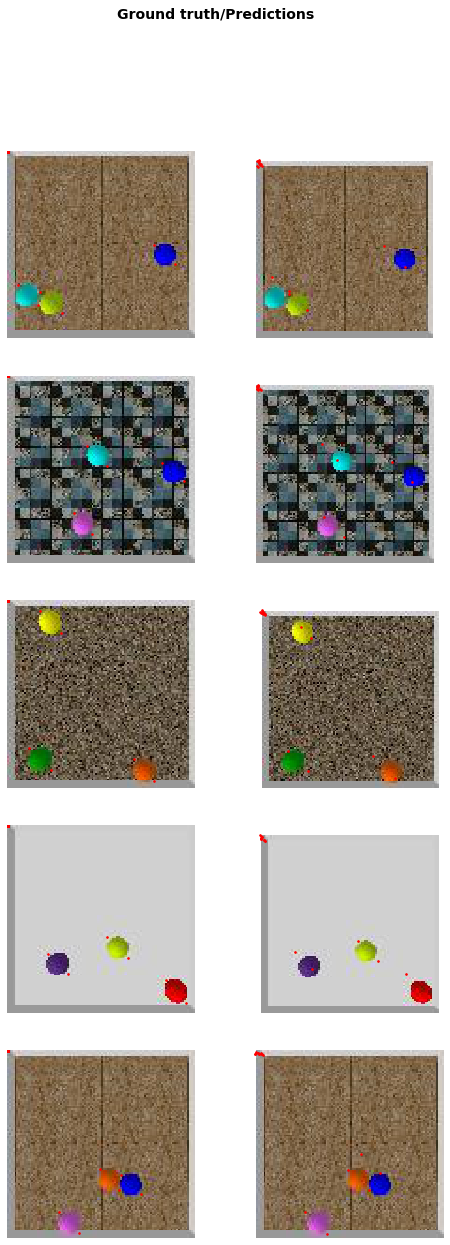

In [108]:
learn.show_results()

In [109]:
learn.save(snapshot_dir / 'stage-2')

In [110]:
learn.load(snapshot_dir / 'stage-2');

In [151]:
dataset = (PointsItemList.from_folder(train_path, extensions=['.jpg'])
            .split_by_rand_pct(valid_pct=0.2, seed=123)
            .label_from_func(get_bbox))